In [67]:
import argparse
import sys

import gym
from gym import wrappers, logger

import numpy as np
import GPy

logger.set_level(logger.INFO)

env = gym.make("Pendulum-v0")

INFO: Making new env: Pendulum-v0
WARN: gym.spaces.Box autodetected dtype as <type 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <type 'numpy.float32'>. Please provide explicit dtype.


In [68]:
outdir = '/tmp/random-agent-results'
env = wrappers.Monitor(env, directory=outdir, force=True)
env.seed(0)


episode_count = 100
reward = 0
done = False

env.reset()

INFO: Clearing 4 monitor files from previous run (because force=True was provided)
INFO: Starting new video recorder writing to /tmp/random-agent-results/openaigym.video.9.23265.video000000.mp4
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.9.23265.video000000.mp4
DEBUG: Starting ffmpeg with "ffmpeg -nostats -loglevel error -y -r 30 -f rawvideo -s:v 500x500 -pix_fmt rgb24 -i - -vcodec libx264 -pix_fmt yuv420p /tmp/random-agent-results/openaigym.video.9.23265.video000000.mp4"


array([-0.94223519, -0.33495202,  0.93078187])

(500, 2)


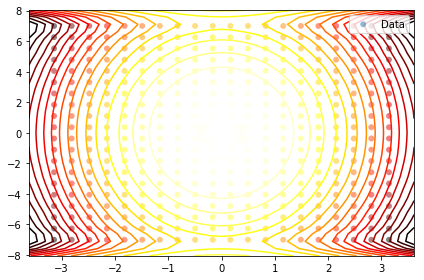

In [63]:
supports = []
for i in np.linspace(-np.pi,np.pi,20):
    for j in np.linspace(-7,7,20):
        supports.append(np.array([i,j]))
for i in np.linspace(-np.pi/8,np.pi/8,10):
    for j in np.linspace(-0.5,0.5,10):
        supports.append(np.array([i,j]))
supports = np.array(supports)
print supports.shape

f = lambda s: [env.env.env.get_cost(s,0.0)]

Y = np.apply_along_axis(f, 1, supports)

V = GPy.models.GPRegression(supports, Y, GPy.kern.src.rbf.RBF(input_dim=2,lengthscale=1.0),noise_var=0.0)

V.plot()

In [64]:
VS = []
for i in range(10):
    print "ITERATION %d" % i
    newY = []
    for s in supports:
        actions = np.reshape(np.linspace(-5,5,200),(-1,1))
        def VAL(u):
            return env.env.env.get_cost(s,u) + 0.9 * V.predict(np.array([env.env.env.preview_step(s,u)]))[0]
        vals = np.apply_along_axis(VAL, 1, actions)
        newY.append([vals.min()])
    newY = np.array(newY)
    print newY.shape
    V = GPy.models.GPRegression(supports, newY, GPy.kern.src.rbf.RBF(input_dim=2,lengthscale=1.0),noise_var=0.0)
    VS.append(V)
VFinal = V

ITERATION 0
(500, 1)
ITERATION 1
(500, 1)
ITERATION 2
(500, 1)
ITERATION 3
(500, 1)
ITERATION 4
(500, 1)
ITERATION 5
(500, 1)
ITERATION 6
(500, 1)
ITERATION 7
(500, 1)
ITERATION 8
(500, 1)
ITERATION 9
(500, 1)


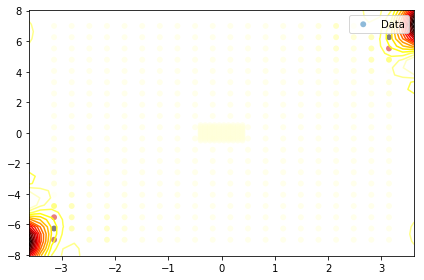

In [65]:
VS[-1].plot()

In [22]:
env = wrappers.Monitor(env, directory=outdir, force=True)
env.seed(0)

[0L]

In [69]:
env.reset()
while True:
    s = env.env.env.state
    print s
    actions = np.reshape(np.linspace(-5,5,200),(-1,1))
    def VAL(u):
        return env.env.env.get_cost(s,u) + 0.9 * VFinal.predict(np.array([env.env.env.preview_step(s,u)]))[0]
    vals = np.apply_along_axis(VAL, 1, actions)
    maxa = actions[vals.argmin()]
    env.step(maxa)
    print maxa

DEBUG: Closing video encoder: path=/tmp/random-agent-results/openaigym.video.9.23265.video000000.mp4
INFO: Starting new video recorder writing to /tmp/random-agent-results/openaigym.video.9.23265.video000001.mp4
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.9.23265.video000001.mp4
DEBUG: Starting ffmpeg with "ffmpeg -nostats -loglevel error -y -r 30 -f rawvideo -s:v 500x500 -pix_fmt rgb24 -i - -vcodec libx264 -pix_fmt yuv420p /tmp/random-agent-results/openaigym.video.9.23265.video000001.mp4"
[ 0.8337218  -0.41996531]
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.9.23265.video000001.mp4
[-0.37688442]
[0.83766333 0.07883053]
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.9.23265.video000001.mp4
[-5.]
[0.85447041 0.33614161]
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.9.23265.video000001.mp4
[5.]
[0.91456086 1.20180907]
DEBUG: Capturing video frame: path=/tmp/random

DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.9.23265.video000001.mp4
[-5.]
[14.10816645  4.43528716]
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.9.23265.video000001.mp4
[-5.]
[14.35241504  4.8849718 ]
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.9.23265.video000001.mp4
[-5.]
[14.61829826  5.31766437]
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.9.23265.video000001.mp4
[-5.]
[14.90242418  5.68251832]
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.9.23265.video000001.mp4
[-5.]
[15.19859525  5.92342146]
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.9.23265.video000001.mp4
[-5.]
[15.49805229  5.98914066]
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.9.23265.video000001.mp4
[-5.]
[15.7903233   5.84542028]
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigy

DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.9.23265.video000001.mp4
[-5.]
[8.28198551 3.42237558]
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.9.23265.video000001.mp4
[-5.]
[8.47222164 3.80472263]
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.9.23265.video000001.mp4
[-5.]
[8.67801652 4.11589749]
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.9.23265.video000001.mp4
[-5.]
[8.89428385 4.32534667]
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.9.23265.video000001.mp4
[-5.]
[9.11452467 4.40481637]
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.9.23265.video000001.mp4
[-5.]
[9.33121423 4.33379125]
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.9.23265.video000001.mp4
[-5.]
[9.53640732 4.10386171]
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.9.2326

DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.9.23265.video000001.mp4
[5.]
[10.10362094 -3.76295351]
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.9.23265.video000001.mp4
[5.]
[ 9.90692728 -3.93387321]
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.9.23265.video000001.mp4
[5.]
[ 9.70784545 -3.98163662]
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.9.23265.video000001.mp4
[5.]
[ 9.51328978 -3.8911134 ]
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.9.23265.video000001.mp4
[5.]
[ 9.33041925 -3.65741062]
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.9.23265.video000001.mp4
[5.]
[ 9.16608192 -3.28674655]
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.9.23265.video000001.mp4
[-5.]
[ 8.99633785 -3.3948814 ]
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.vide

ResetNeeded: Trying to step environment which is currently done. While the monitor is active for Pendulum-v0, you cannot step beyond the end of an episode. Call 'env.reset()' to start the next episode.

In [24]:
env.env.env.env.env.get_cost

<Monitor<Monitor<Monitor<TimeLimit<PendulumEnv<Pendulum-v0>>>>>>